# <font color="blue"> **Case Study:** Social Media Disaster Tweets Dataset </font>
---

In this case study, you will look at a dataset that captures social media responses in the form of tweets. Tweet data is one of the "dirtiest" data around. It has hyperlinks, hashtags, abbreviations, casual languages, etc. You will need to apply various text preprocessing techniques you have learnt earlier, such as lowercasing, noise removal, tokenization, stemming, lemmatization, and text normalization.

At the end of this tutorial, you will be able to:
* clean a dataset using basic `python` and several text libraries such as `nltk`, `spacy` and `regex`

## Importing data
---

In this case study, you will be looking at a dataset that captures social media responses in the from of tweets. This dataset consists of a series of tweets, along with an indication of whether the tweet is relevant to a disaster, or not relevant to a disaster. Click [here](https://sl2files.sustainablelivinglab.org/DatasetSocialMedia-Disaster-tweets-DFE.csv) to download this dataset.
  
First, begin by importing the dataset. The code below downloads and saves a `.csv` file located at `url` using the library `urllib`.

In [ ]:
from urllib import request

url = 'https://sl2files.sustainablelivinglab.org/DatasetSocialMedia-Disaster-tweets-DFE.csv'

# open the url, read the csv file, and store in variable "csv"
csv = request.urlopen(url).read()

# write "csv" to "tweets.csv" and store it in colab
with open('./tweets.csv', 'wb') as fx:
    fx.write(csv)

Great! You have now downloaded the dataset! Check out the `.csv` file you have just created!

## Data understanding
---

Now, take a closer look at this dataset.
* How do you think this dataset can be used to train an AI system?
* How do you think this dataset can be helpful?
  
Being able to classify tweets will allow you to filter out noise and gain information from useful tweets in real time during an actual disaster. These tweets may contain helpful information on places to avoid, how to help, or how to ask for help.

Notice how the dataset is structured:
* What headers do you see?
* What are their data types?
* Where are the tweet texts stored?

> *Type your answer here*

## Extracting the text
---

In [ ]:
# import the necessary libraries
import pandas as pd

print ("You have successfully imported pandas version "+pd.__version__)

You have successfully imported pandas version 2.1.4


In [ ]:
# load tweets.csv into a pandas dataframe
df = pd.read_csv('tweets.csv')

# display first 5 rows of the dataframe
df.head(10)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN
5,5,778243828,True,golden,140,NaN,Relevant,1.0000,Relevant,NaN,NaN,All residents asked to 'shelter in place' are ...,17.0,NaN
6,6,778243831,True,golden,142,NaN,Relevant,1.0000,Relevant,NaN,NaN,"13,000 people receive #wildfires evacuation or...",18.0,NaN
7,7,778243832,True,golden,151,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,19.0,NaN
8,8,778243833,True,golden,143,NaN,Relevant,1.0000,Relevant,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,20.0,NaN
9,9,778243834,True,golden,136,NaN,Relevant,0.9606,Relevant\nCan't Decide,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,21.0,NaN


---
**Task:** ✏️ How would you inspect the last 10 lines of the dataframe? Or any random 10 lines of the dataframe? Try it on the code blocks below!

In [ ]:
# inspect the last 10 lines of the dataframe


In [ ]:
# inspect any random 10 lines of the dataframe


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
# inspect the last 10 lines of the dataframe
df.tail(10)

# inspect any random 10 lines of the dataframe
df.sample(10)
```
</details>

The `pandas` dataframe looks like a spreadsheet, with each column containing a category of data, and each row representing the information from a single tweet.

In [ ]:
# find number of rows in this dataset
len(df)

10876

In [ ]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10876 non-null  int64  
 1   _unit_id               10876 non-null  int64  
 2   _golden                10876 non-null  bool   
 3   _unit_state            10876 non-null  object 
 4   _trusted_judgments     10876 non-null  int64  
 5   _last_judgment_at      10792 non-null  object 
 6   choose_one             10876 non-null  object 
 7   choose_one:confidence  10876 non-null  float64
 8   choose_one_gold        87 non-null     object 
 9   keyword                10789 non-null  object 
 10  location               7238 non-null   object 
 11  text                   10876 non-null  object 
 12  tweetid                10876 non-null  float64
 13  userid                 10789 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(7)
memory usa

There are many columns, but focus your attention now on the column where the tweets are stored: the `text` column.

In [ ]:
df['text'].head()

,text
0,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada


In [ ]:
df['text'].sample(5)

,text
6963,@eileenmfl are you serious?
3923,Thought it was Friday all day today. Was beyon...
3124,Malaysia seem more certain than France.\n\nPla...
9972,Crptotech tsunami and banks.\n http://t.co/KHz...
9251,descended or sunk however it may be to the sha...


In [ ]:
# convert into list
list(df['text'].sample(5))

['Well unfortunately for my followers stage pics came in today. Advanced apologies for the inundation\x89Û_ https://t.co/u8hSrtrXMm',
 'Debris confirmed from MH370; relatives hope for discovery of crash site http://t.co/rLFtjmHHvT via @Reuters #Video',
 '@brokenscnecal I just though about panic! at the disco when I said that',
 "I think I just blew up @HopeInHearts notifications. Go check her out she's so encouraging to me ???? love her ??",
 'Chick masturbates a guy until she gets exploded on her face &gt; http://t.co/5QhoeHE9hf']

Next, create a new dataframe `df_text` to store just the text information (since you do not need the rest of the columns for text analysis). It is a good practice to put `df` in front of the name of dataframe to help you remember that you are working with an object of type dataframe. Using `.copy()` makes sure that you do not modify the original raw dataset.

In [ ]:

df_text = df['text'].copy()

In [ ]:
type(df_text)

pandas.core.series.Series

In [ ]:
df_text = df['text'].copy().to_frame()

In [ ]:
type(df_text)

pandas.core.frame.DataFrame

In [ ]:
df_text.head()

,text
0,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada


In [ ]:
# make sure all the rows are copied from df to df_text
assert len(df_text) == len(df)

## Text preprocessing using `nltk`
---

In its raw form, tweets are just strings of text. While humans can easily read and understand strings of text, computers have a much harder time doing so. Therefore, you will have to perform preprocessing on these strings to break them up into a form that our computers can recognize and work on. Preprocessing the text will also allow you to analyze and visualize the text, and to look for trends and features that your computer will then be able to use to classify your text.
  
You will first need to import the `nltk` package to process and visualize text. (`nltk` = **N**atural **L**anguage **T**ool**k**it)

In [ ]:
# import the necessary libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

print ("You have successfully imported nltk version "+nltk.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


You have successfully imported nltk version 3.8.1


### Tokenization
---

The first step in the NLP task is to tokenize your tweets. Do you remember what tokenization does?

You will use a single tweet to demonstrate what each process does. The tokenization is done by calling `nltk.tokenize.word_tokenize(text)`. See if you can tell what the function did by printing the text before and after tokenization.

In [ ]:
# df_text is of type dataframe
df_text

,text
0,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada
...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872,Police investigating after an e-bike collided ...
10873,The Latest: More Homes Razed by Northern Calif...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
# Crtl + / to have multiple # to make the rows as comments

In [ ]:
sample_tweet = df_text.iloc[100]['text']
print('Data type:', type(sample_tweet))
print('Before tokenization:', sample_tweet)

Data type: <class 'str'>
Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour


In [ ]:
tokenized_tweet = nltk.tokenize.word_tokenize(sample_tweet)
print('After tokenization:', tokenized_tweet)

After tokenization: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


Can you tell what the tokenization step did? When given a sentence, humans can easily tell what individual words are, but computers can't. You need to break the sentence up into words for the computer.
  
Another benefit of breaking up the sentence is that you can now measure the number of *unique* words in the corpus (our collection of texts). This is known as the **vocabulary** of the corpus.

To do this you use a technique called [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python). The objective is to put all tokens in all tweets into a single list, then finding the number of unique values in that list of tokens.  

In [ ]:
# Creates a list of tweets, with each tweet being a list of tokens
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in list(df_text['text'])]

# Flattens the lists into a single list, then counts the number of unique tokens
len(set([y for x in tokenized_raw for y in x]))

34858

You now know that there are 34878 unique tokens in the tweet dataset. That seems like a lot of words! One of the goals of text normalization (such as *stemming* and *lemmatization*) is to reduce the number of words in the vocabulary by eliminating redundant words without sacrificing the meaning of the text.

### Stemming and Lemmatization
---

Now, you will look at what stemming and lemmatization (or lemming) do to the same sample tweet. To do stemming and lemmatization, use the Porter Stemmer `nltk.stem.PorterStemmer()` and the Word Net Lemmatizer `nltk.stem.WordNetLemmatizer()` respectively.

Look at the printed stemmed and lemmatized outputs and compare them to the original tokenized text to spot the difference.

In [ ]:
ps = nltk.stem.PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stemmed_tweet = [ps.stem(word) for word in tokenized_tweet]
lemmatized_tweet = [wnl.lemmatize(word) for word in tokenized_tweet]

print(f'Tokenized tweet: {tokenized_tweet}')
print(f'Stemmed tweet: {stemmed_tweet}')
print(f'Lemmatized tweet: {lemmatized_tweet}')

Tokenized tweet: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']
Stemmed tweet: ['http', ':', '//t.co/gkye6gjtk5', 'had', 'a', '#', 'personalinjuri', 'accid', 'thi', 'summer', '?', 'read', 'our', 'advic', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']
Lemmatized tweet: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


In [ ]:
# display tweets in the form of table, for comparison
pd.DataFrame(
    {'Tokenized tweet': tokenized_tweet,
     'Stemmed tweet' : stemmed_tweet,
     'Lemmatized tweet' : lemmatized_tweet
     })

,Tokenized tweet,Stemmed tweet,Lemmatized tweet
0,http,http,http
1,:,:,:
2,//t.co/GKYe6gjTk5,//t.co/gkye6gjtk5,//t.co/GKYe6gjTk5
3,Had,had,Had
4,a,a,a
5,#,#,#
6,personalinjury,personalinjuri,personalinjury
7,accident,accid,accident
8,this,thi,this
9,summer,summer,summer


Can you tell what they do? The [difference](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/) is subtle:

* A **stemmer** works by shortening words so that words with the same meaning but different forms will end up with the same token. For example, the token 'accident' was stemmed to 'accid'. Other similar words such as 'accidentally', 'accidental', and 'accidents' will all be stemmed to 'accid'. This helps to group words with similar meanings together.
  
* A **lemmatizer** is slightly different. It searches for words with the same meaning and replaces them with the root word. So words with the same meaning but quite different spellings will be understood by the computer to be a single word. The disadvantage of a lemmatizer is that it can take a long time to run.


Notice the imperfections of the output above too. You would expect "had" to be lemmatized to "have", but the output above still shows "had". This is because `WordNetLemmatizer()` requires the `pos` argument (`pos` = part of speech) to be accurate. The default `pos` has been set to `"n"`, which means noun. Refer to the [WordNet documentation](https://www.nltk.org/_modules/nltk/stem/wordnet.html) here.

In [ ]:
# notice that the output is incorrect
wnl.lemmatize("had")

'had'

In [ ]:
# notice now that the output is correct
# pos = part of speech; v = verb
wnl.lemmatize("had", pos="v")

'have'

### Removing stopwords
---
Another common text normalization technique is removing stopwords. Do you remember what stopwords are? `nltk` provides a list of stopwords.

In [ ]:
# show stopwords list in nltk
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

---
**Task:** ✏️ How many stopwords are there in the list above?

In [ ]:
# insert your code here

<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
len(nltk.corpus.stopwords.words('english'))
```
</details>

You can choose to add a few more stopwords into the list, depending on the task at hand. In this case study, since you are dealing with tweet data, it is good to add some task-specific stopwords here, such as `@`, `#`, `http`, `https` and `:`.

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

# Add additional stopwords
stopwords.append('@')
stopwords.append('#')
stopwords.append('http')
stopwords.append('https')
stopwords.append(':')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Putting them all together
---
Now that you know what each piece of code does, it is time to build a function that takes in the dataframe, and returns the tokenized tweets.

In [ ]:
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(tweet)
    stemmed = [ps.stem(word) for word in tokenized_tweet]
    processed = [w.lower() for w in stemmed if w not in stopwords]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

In [ ]:
stemmed_tweets = tokenizer(df_text)

# store the list of processed text into df_text
df_text['stemmed_text'] = stemmed_tweets
df_text

,text,stemmed_text
0,Just happened a terrible car crash,"[happen, terribl, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for..."
2,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe..."
3,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro..."
4,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]"
...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw..."
10872,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p..."
10873,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil..."
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ..."


Pay close attention to the processed tweets.

Do you notice that there are many words that are cut (e.g. "terribl" instead of "terrible")? Do you remember why this is done?

> *Type your answer here*

---
**Task:** ✏️ Print out the size of your processed vocabulary. How many words does it have now? Is it fewer or more than the original vocabulary?

In [ ]:
# insert your code here


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
len(set([y for x in tweets for y in x]))
```
It now has 25,916 words. Fewer than the original vocabulary size.
</details>

With these preprocessing steps, we have taken raw tweet data, chopped it up into individual tokens, removed stopwords, stemmed, and made it all lowercase. This has decreased our vocabulary size by almost 10,000 tokens!

---
**Task:** ✏️ Now, play around with `df_text` and the `process_tweet()` function a little bit more. What happens if you use a *lemmatizer* instead of a *stemmer*? What other stopwords can you exclude? What about removing punctuation?

In [ ]:
# insert your code here


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(tweet)
    lemmatized = [wnl.lemmatize(word) for word in tokenized_tweet]
    processed = [w.lower() for w in lemmatized if w not in stopwords]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

lemmatized_tweets = tokenizer(df_text)

# store the list of processed text into df_text
df_text['lemmatized_text'] = lemmatized_tweets
df_text
```
</details>

### Data visualization: Histogram
---
It is often useful to visualize the text in the form of wordcloud or histogram. In this case, suppose you want to analyze the distribution of the number of words in each tweet using a **histogram**.
* What are the most frequently occurring words in a tweet?
* How many times do they occur?

In the process of classifying your dataset, your model may look at factors such as the length of the tweet, the number of words, etc. Plotting your data out also helps you to ensure that your code is working, and not throwing out ridiculous numbers.

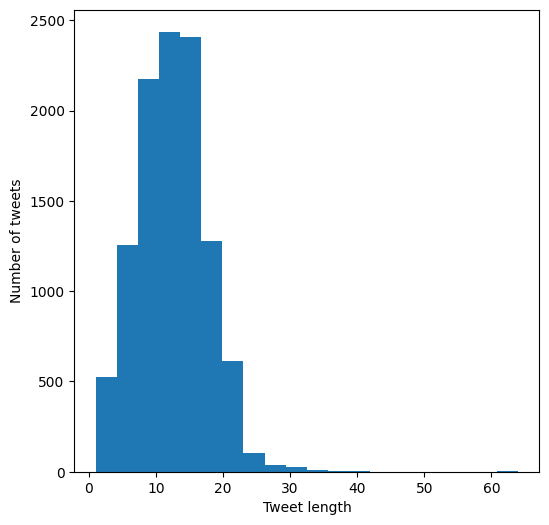

In [ ]:
import matplotlib.pyplot as plt

# set number of bins = 20
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    fig = plt.figure(figsize=(6, 6))
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths, bins=20)
    plt.show()
    return sentence_lengths

tweet_lengths = plot_hist(stemmed_tweets)

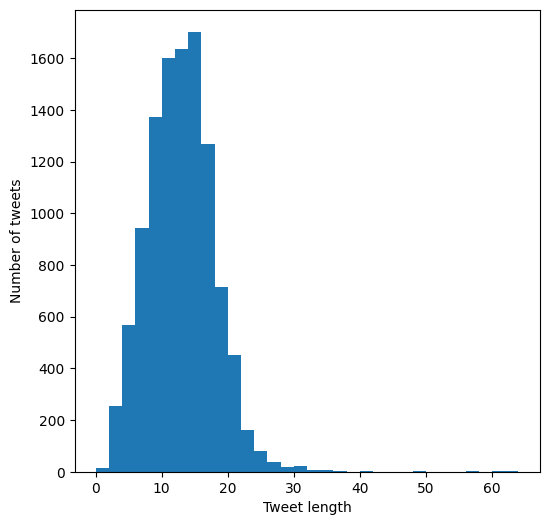

In [ ]:
import matplotlib.pyplot as plt

# set binwidth = 2, starting from 0
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    binwidth = 2
    fig = plt.figure(figsize=(6, 6))
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths,
             bins=range(0,max(sentence_lengths)+binwidth,binwidth))
    plt.show()
    return sentence_lengths

tweet_lengths = plot_hist(stemmed_tweets)

You can now see that the average tweet has about 10-16 words, and that there are a few with more than 60 words. What exactly is the length of the shortest tweet, the length of the longest tweet, and the average length of all tweets? Print those values out.

---
**Task:** ✏️ Print out the values of:
* the length of the shortest tweet
* the length of the longest tweet
* the average length of all tweets

In [ ]:
# insert your code here


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
print(f'Length of shortest tweet: {min(tweet_lengths)}')
print(f'Length of longest tweet: {max(tweet_lengths)}')
print(f'Length of average tweet: {sum(tweet_lengths)/len(tweet_lengths):.2f}')
```
</details>

You are getting to know your data more and more now. Now, dive deeper and see if you can determine if there is a difference in the average length of tweets for relevant and not relevant tweets. Perhaps it can be used as a good feature for future analyis.
  
To do that, you use the `choose_one` column in `df`. If the value in the column is 'Relevant', the tweet is classified as relating to a natural disaster. If the value is 'Not Relevant', the tweet does not relate to a natural disaster.  

---
**Task:** ✏️ Print out the values of:
* the average length of tweet for *relevant* tweets
* the average length of tweet for *not relevant* tweets

**Hints**:
* In the following code, the dataframe `df_rel` has been constructed to contain the processed tweets and the relevance.
* Create two dataframes, one containing only 'Relevant' tweets, and one containing only 'Not Relevant' tweets. For 'Relevant' tweets, this can be done by subsetting the dataframe: `df_rel[df_rel['choose_one']=='Relevant']`. Can you create the dataframe of 'Not Relevant' examples?
* To calculate the length of each tweet, you can use the `.apply(len)` function. You can also use `.mean()` to get the mean of the results.

In [ ]:
df_rel = df['choose_one'].copy().to_frame()
df_rel['text'] = df['text']
df_rel['processed_text'] = stemmed_tweets
df_rel

,choose_one,text,processed_text
0,Relevant,Just happened a terrible car crash,"[happen, terribl, car, crash]"
1,Relevant,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for..."
2,Relevant,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe..."
3,Relevant,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro..."
4,Relevant,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]"
...,...,...,...
10871,Relevant,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw..."
10872,Relevant,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p..."
10873,Relevant,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil..."
10874,Relevant,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ..."


In [ ]:
# subset 'Relevant' tweets only
df_pos = df_rel[df_rel['choose_one']=='Relevant']
df_pos

,choose_one,text,processed_text
0,Relevant,Just happened a terrible car crash,"[happen, terribl, car, crash]"
1,Relevant,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for..."
2,Relevant,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe..."
3,Relevant,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro..."
4,Relevant,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]"
...,...,...,...
10871,Relevant,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw..."
10872,Relevant,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p..."
10873,Relevant,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil..."
10874,Relevant,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ..."


In [ ]:
# insert your code here


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
# subset 'Not Relevant' tweets only
df_neg = df_rel[df_rel['choose_one']=='Not Relevant']
df_neg

# print average length of tweet for 'Relevant' and 'Not Relevant' tweets
print(f'Average length of tweet for Relevant tweets: {df_pos["processed_text"].apply(len).mean()}')
print(f'Average length of tweet for Not Relevant tweets: {df_neg["processed_text"].apply(len).mean()}')
```
</details>

Do you think tweet length make a good feature?

In [ ]:
your_answer = "Choose one" #@param ["Yes", "No"] {allow-input: true}

### Data visualization: Word cloud
---

Suppose now that you want to visualize the most frequently occurring texts using `WordCloud` instead.

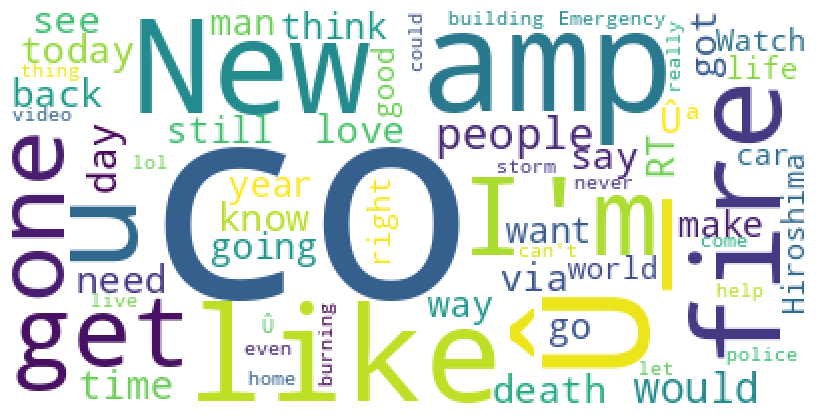

In [ ]:
from wordcloud import WordCloud

# for WordCloud() to work, you have to join all the text as one huge string
tweet_text = " ".join(tweet for tweet in df['text'])

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(tweet_text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

---
**Task:** ✏️ The current wordcloud shows all the words appearing in the original tweet. As you can observe, it includes words like "https", "co", etc which you do not expect to appear. Modify the wordcloud now so that it only shows the most frequently appearing text in the 'Relevant' tweets.

**Hint**:
* Use `df_pos` that you have created earlier.

In [ ]:
# insert your code here


<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
tweet_text = " ".join(tweet for tweet in df_pos['text'])

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(tweet_text)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
```
</details>

## Text preprocessing using `spacy`

---

Apart from `nltk`, you may also use another popular text processing library, `spacy`. Both libraries have their advantages and disadvantages, but the syntax for `spacy` will be slightly different from `nltk`.  Read about spacy [here](https://spacy.io/).

In [ ]:
# import the necessary libraries
import spacy

nlp = spacy.load("en_core_web_sm")

The `spacy` library provides many useful NLP preprocessing, including tokenization, lemmatization, part-of-speech tagging, syntactic dependency parsing, and named entity recognition (ner).

When you run `nlp`, your text enters a processing `pipeline` that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

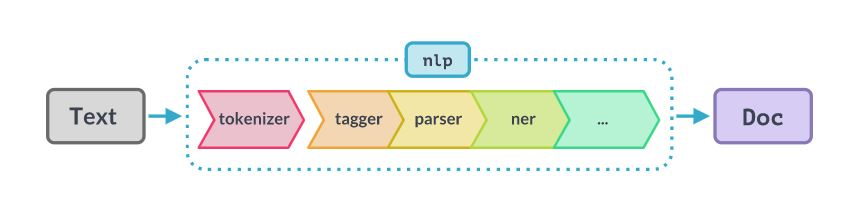



Run the cells below to have a quick feel of the power of `spacy`.

In [ ]:
text = "Singapore Polytechnic has many courses to help you to upskill and learn in Singapore. Isn't it great?"

doc = nlp(text)
doc

Singapore Polytechnic has many courses to help you to upskill and learn in Singapore. Isn't it great?

In [ ]:
# preprocess text using spacy
for w in doc:
    print(w.text, w.lemma_, w.pos_, w.dep_, w.ent_type_)

Singapore Singapore PROPN compound ORG
Polytechnic Polytechnic PROPN nsubj ORG
has have VERB ROOT 
many many ADJ amod 
courses course NOUN dobj 
to to PART aux 
help help VERB relcl 
you you PRON dobj 
to to PART aux 
upskill upskill VERB xcomp 
and and CCONJ cc 
learn learn VERB conj 
in in ADP prep 
Singapore Singapore PROPN pobj GPE
. . PUNCT punct 
Is be AUX ROOT 
n't not PART neg 
it it PRON nsubj 
great great ADJ acomp 
? ? PUNCT punct 


Let's add some formatting to make the output more readable.

In [ ]:
# preprocess text using spacy
for w in doc:
    print(f' {w.text:<15}{w.lemma_:<15} {w.pos_:<15} {w.dep_:<15} {w.ent_type_:<10}')


 Singapore      Singapore       PROPN           compound        ORG       
 Polytechnic    Polytechnic     PROPN           nsubj           ORG       
 has            have            VERB            ROOT                      
 many           many            ADJ             amod                      
 courses        course          NOUN            dobj                      
 to             to              PART            aux                       
 help           help            VERB            relcl                     
 you            you             PRON            dobj                      
 to             to              PART            aux                       
 upskill        upskill         VERB            xcomp                     
 and            and             CCONJ           cc                        
 learn          learn           VERB            conj                      
 in             in              ADP             prep                      
 Singapore      Singapore

### Visualisation of entities in spacy using displacy

In [ ]:
from spacy import displacy
from IPython.core.display import HTML

In [ ]:
# Generate a displacy visualization
html = displacy.render(doc, style='ent', jupyter=False)

# Display the HTML in Google Colab
HTML(html)

---
**Task:** ✏️ Let's try it for some parts of our tweets.

In [ ]:
# print out the first 1000 characters of the tweet
doc_tweet = nlp(tweet_text[:1000])

# insert your code here to generate a displacy visualisation



<details>
<summary><font color="red">Click to show solution</font></summary>
    
```python
# print out the first 1000 characters of the tweet
doc_tweet = nlp(tweet_text[:1000])

# Generate a displacy visualization
html = displacy.render(doc_tweet, style='ent', jupyter=False)

# Display the HTML in Google Colab
HTML(html)
```
</details>

### Tokenization
---

In [ ]:
# Review the dataframe again
df_text

,text,stemmed_text
0,Just happened a terrible car crash,"[happen, terribl, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for..."
2,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe..."
3,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro..."
4,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]"
...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw..."
10872,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p..."
10873,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil..."
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ..."


In [ ]:
# sample tweet
sample_tweet = df_text.iloc[100]['text']
print('Data type:', type(sample_tweet))
print('Before tokenization:', sample_tweet)

# recap: tokenization using nltk
tokenized_tweet = nltk.tokenize.word_tokenize(sample_tweet)
print('After tokenization (NLTK):', tokenized_tweet)

# tokenization using spacy
doc = nlp(sample_tweet)
print('After tokenization (spacy):', [w.text for w in doc])

Data type: <class 'str'>
Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour
After tokenization (NLTK): ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']
After tokenization (spacy): ['http://t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


As can be seen from the output above, the tokenization results are mostly similar for both `nltk` and `spacy` libraries, but there can be minor differences.

### Stemming and Lemmatization
---

`spacy` library does not provide stemming. You can only do lemmatization with `spacy`.

In [ ]:
print('After lemmatization (spacy):', [w.lemma_ for w in doc])

After lemmatization (spacy): ['http://t.co/GKYe6gjTk5', 'have', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']


### Putting them all together
---
Now that you know how to lemmatize one sample tweet, you can extend it to lemmatize the whole tweets in the dataframe.

In [ ]:
# warning in advance: this cell takes quite long to execute (2-3mins)
df_text['lemmatized_text'] = df_text['text'].apply(
    lambda row: " ".join([w.lemma_ for w in nlp(row)]))
df_text

,text,stemmed_text,lemmatized_text
0,Just happened a terrible car crash,"[happen, terribl, car, crash]",just happen a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for...",our deed be the Reason of this # earthquake ma...
2,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe...","hear about # earthquake be different city , st..."
3,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro...","there be a forest fire at spot pond , geese be..."
4,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]",forest fire near La Ronge Sask . Canada
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw...",M1.94 [ 01:04 utc]?5 km S of Volcano Hawaii . ...
10872,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p...",Police investigate after an e - bike collide w...
10873,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil...",the late : More home raze by Northern Californ...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ...",meg issue Hazardous Weather Outlook ( HWO ) ht...


## Text preprocessing using `regex` (optional)
---

Regular expression (`regex`) is a sequence of character(s) which is used to find and replace patterns in a string or file. It is important to keep in mind that every character type has a corresponding pattern code. For example, digits have the placeholder pattern code `\d`.
The backslash `\` allows python to read it as a special code and not the letter "d".

To use regular expression in Python, you first need to import the `re` library. Click [here](https://www.w3schools.com/python/python_regex.asp) to learn more about this library.

Run the cells below to have a quick feel of the power of `regex`.

In [ ]:
# import the necessary libraries
import re

In [ ]:
text = "My phone number is 97123456!!!!"
text

'My phone number is 97123456!!!!'

In [ ]:
# remove digits
text_remove_digits = re.sub(r'\d','',text)
text_remove_digits

'My phone number is !!!!'

In [ ]:
# remove digits and punctuation
text_remove_digits_punctuation = re.sub(r'[^\w\s]','',text_remove_digits)
text_remove_digits_punctuation

'My phone number is '

In [ ]:
# define a function to lowercase, remove digits and punctuations
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d','',text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

print(f'Original text: {text}')
print(f'Cleaned text: {clean_text(text)}')

Original text: My phone number is 97123456!!!!
Cleaned text: my phone number is 


In [ ]:
# apply regex to tweet
sample_tweet = df_text.iloc[100]['text']
print(f'Original tweet: {sample_tweet}')
print(f'Cleaned tweet: {clean_text(sample_tweet)}')

Original tweet: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour
Cleaned tweet: httptcogkyegjtk had a personalinjury accident this summer read our advice amp see how a solicitor can help otleyhour


In [ ]:
# apply regex to tweet dataframe
df_text['text_cleaned_regex'] = df_text['text'].apply(lambda x: clean_text(x))
df_text

,text,stemmed_text,lemmatized_text,text_cleaned_regex
0,Just happened a terrible car crash,"[happen, terribl, car, crash]",just happen a terrible car crash,just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,"[deed, reason, thi, earthquak, may, allah, for...",our deed be the Reason of this # earthquake ma...,our deeds are the reason of this earthquake ma...
2,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, ,, stay, safe...","hear about # earthquake be different city , st...",heard about earthquake is different cities sta...
3,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, ,, gees, flee, acro...","there be a forest fire at spot pond , geese be...",there is a forest fire at spot pond geese are ...
4,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, rong, sask, ., canada]",forest fire near La Ronge Sask . Canada,forest fire near la ronge sask canada
...,...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw...",M1.94 [ 01:04 utc]?5 km S of Volcano Hawaii . ...,m utckm s of volcano hawaii httptcozdtoydebj
10872,Police investigating after an e-bike collided ...,"[polic, investig, e-bik, collid, car, littl, p...",Police investigate after an e - bike collide w...,police investigating after an ebike collided w...
10873,The Latest: More Homes Razed by Northern Calif...,"[latest, home, raze, northern, california, wil...",the late : More home raze by Northern Californ...,the latest more homes razed by northern califo...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, (, hwo, ...",meg issue Hazardous Weather Outlook ( HWO ) ht...,meg issues hazardous weather outlook hwo httpt...


Notice how quickly this piece of code runs using `regex` library, as compared to the `spacy` library. So, each library comes with its advantages and disadvantages. In practice, you will have to decide which library to use for the applications at hand.

## <font color="blue">**Conclusion**</font>
---
Congratulations! You have learnt how to use several Python text libraries such as `nltk`, `spacy` and `regex` to clean dirty datasets such as tweets.

PS: Don't worry if there seems to be information overload at this stage. You need time and a lot of practice to master the various preprocessing techniques! If you cannot wrap your head around so many libraries at once, focus on one first (we recommend `nltk` as a start). You will learn `spacy` and `regex` more in depth in the subsequent lessons, too.